In [92]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

sjerplot = gpd.read_file('/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/dpdshapefilelatlong.shp')
nonzero = sjerplot.loc[~(sjerplot["X"] == 0) & ~(sjerplot["Y"] == 0) & ~(sjerplot["Cancelled"] != 0)].copy()
nonzero = nonzero.loc[nonzero["Source"] != "Self Initiated"]

print(nonzero.shape) 
nonzero.head(6)

pd.set_option("display.max_columns", 100,"display.max_rows",100)

(122803, 15)


In [24]:
nonzero.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 122803 entries, 0 to 278272
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   Event Numb  122803 non-null  int64   
 1   Case Numbe  34318 non-null   object  
 2   Call Date   122803 non-null  object  
 3   Call Time   122803 non-null  object  
 4   Source      122803 non-null  object  
 5   Priority    122258 non-null  object  
 6   Nature      122803 non-null  object  
 7   Address     122803 non-null  object  
 8   X           122803 non-null  int64   
 9   Y           122803 non-null  int64   
 10  District    122148 non-null  object  
 11  Beat        122128 non-null  object  
 12  Dispositio  122803 non-null  object  
 13  Cancelled   122803 non-null  int64   
 14  geometry    122803 non-null  geometry
dtypes: geometry(1), int64(4), object(10)
memory usage: 15.0+ MB


In [25]:
nonzero["Source"].value_counts()

Wireless 911 Call                57069
Phone Call                       38132
Alarm Line                        9386
E-911                             8741
ASAP Alarm Interface              3806
{Other}                           2525
Language Line                     1442
Report Only                        816
Radio                              412
Texting                            287
DCI Message                        141
In House Translation                33
(blank)                              7
Telephone Device For The Deaf        6
Name: Source, dtype: int64

In [26]:
type(nonzero)

geopandas.geodataframe.GeoDataFrame

In [27]:
nonzero.total_bounds


array([-79.10436128, -82.77787819, 103.82293245,  36.24634408])

In [28]:
nonzero.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
nonzero.geom_type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
278266    Point
278267    Point
278268    Point
278271    Point
278272    Point
Length: 122803, dtype: object

In [30]:
nonzero.shape

(122803, 15)

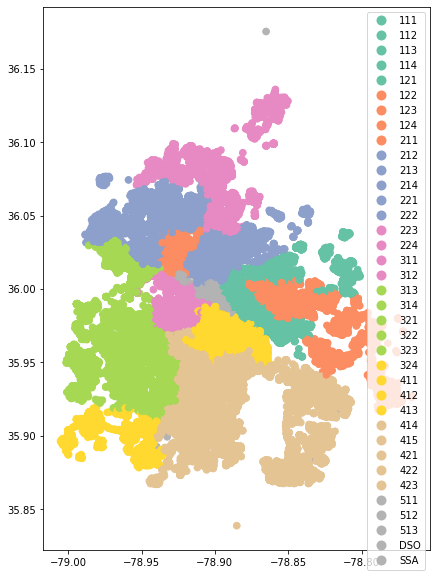

In [31]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax, aspect=1);

In [126]:
policebeats = gpd.read_file('/Users/erikrobertsson/Desktop/Police_Beats/Police_Beats.shp')
# policebeats2 = policebeats.to_crs("SR-ORG:12")
# law_beat_shapefile.to_file("path/to/new/output/file.shp")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


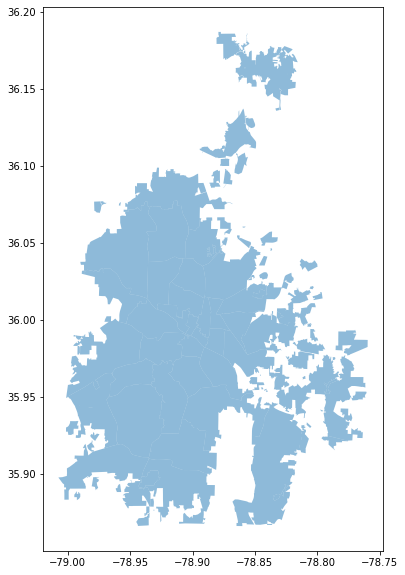

In [33]:
fig, ax = plt.subplots(figsize = (10,10))
policebeats.plot(ax = ax, alpha = 0.5)
plt.show()

In [34]:
policebeats.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [94]:
policebeats = policebeats.to_crs("4326")
policebeats.head()

,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen,geometry
0,1,29657.869141,None,None,D2,299,SSA,None,2.075708e+07,29657.868615,"POLYGON ((-78.86588 36.18066, -78.86602 36.180..."
1,2,18915.720703,None,None,D2,299,SSA,None,2.086135e+06,18915.724912,"POLYGON ((-78.85731 36.17823, -78.85731 36.178..."
2,3,1193.728027,None,None,D2,299,SSA,None,6.682308e+04,1193.727878,"POLYGON ((-78.86585 36.18027, -78.86572 36.180..."
3,4,1308.963013,None,None,DSO,999,DSO,None,6.932677e+04,1308.962953,"POLYGON ((-78.86585 36.18027, -78.86635 36.179..."
4,5,1467.506958,None,None,DSO,999,DSO,None,8.512911e+04,1467.506955,"POLYGON ((-78.86452 36.17903, -78.86448 36.179..."


In [95]:
nonzero = gpd.GeoDataFrame(nonzero, geometry=gpd.points_from_xy(nonzero.X, nonzero.Y))
nonzero = nonzero.set_crs("epsg:2264")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (2055372.000 818537.000)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (2024961.000 815902.000)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (2038061.000 841530.000)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (2045947.000 796806.000)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (2037016.000 818259.000)


In [96]:
nonzero = nonzero.to_crs("EPSG:4326")
nonzero.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry
0,21000002,None,1/1/2021,12:00:28AM,Wireless 911 Call,3,SOUND OF SHOTS,100 PEBBLESTONE DR,2055372,818537,D1,121,Resolved Without Report,0,POINT (-78.81280 35.99886)
1,21000006,None,1/1/2021,12:01:41AM,Wireless 911 Call,3,SOUND OF SHOTS,CARROLL ST/MOREHEAD AVE,2024961,815902,D3,312,Resolved Without Report,0,POINT (-78.91562 35.99174)
2,21000007,None,1/1/2021,12:01:45AM,Wireless 911 Call,3,SOUND OF SHOTS,1300 SHILEY DR,2038061,841530,D2,223,Resolved Without Report,0,POINT (-78.87123 36.06210)
3,21000008,None,1/1/2021,12:02:10AM,Wireless 911 Call,3,SOUND OF SHOTS,0 EDGEBROOK CIR,2045947,796806,D4,414,Resolved Without Report,0,POINT (-78.84478 35.93921)
4,21000010,None,1/1/2021,12:02:39AM,Wireless 911 Call,3,SOUND OF SHOTS,1200 ALMA ST,2037016,818259,D1,112,Resolved Without Report,0,POINT (-78.87486 35.99818)


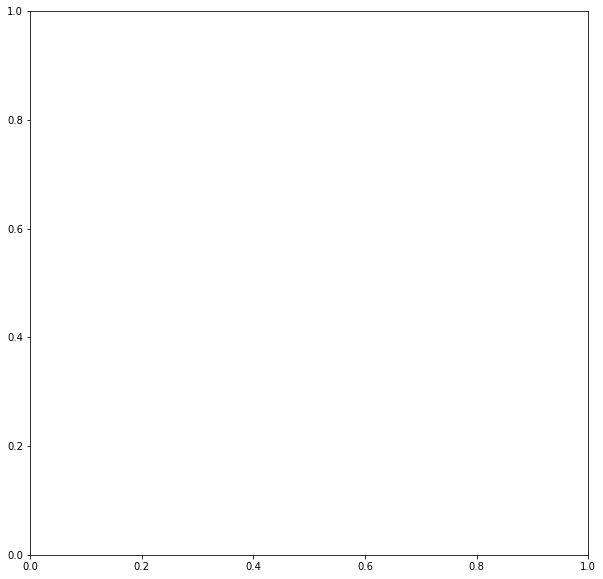

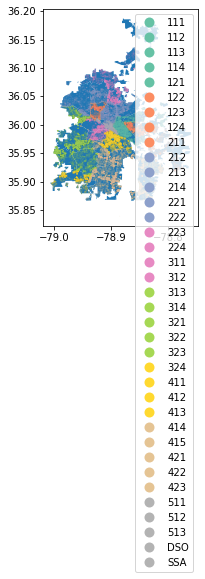

In [32]:
fig, ax = plt.subplots(figsize = (10,10))

# quickly plot the data adding a legend
# base = policebeats.plot()
nonzero.plot(column='Beat', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=0.001, 
                         cmap="Set2", ax=policebeats.plot(), aspect=1);

<AxesSubplot:>

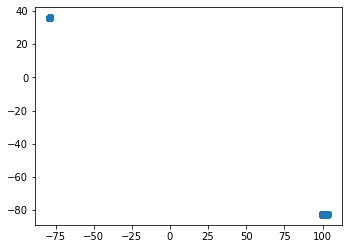

In [39]:
base = policebeats.plot()
nonzero.plot(ax = base)

In [97]:
beatswithcalls = nonzero.sjoin(policebeats, how="inner", predicate='contains')
beatswithcalls.head()

,Event Numb,Case Numbe,Call Date,Call Time,Source,Priority,Nature,Address,X,Y,District,Beat,Dispositio,Cancelled,geometry,index_right,OBJECTID,PERIMETER,STATUS,CONTIGUOUS,LAWDIST,LAWBEAT,CAD,GIS_DataA1,ShapeSTAre,ShapeSTLen


In [7]:
nonzero.to_file("/Users/erikrobertsson/Documents/dataplus/dpdshapefilelatlong/filitered shapefile/filtereddpdshapefile.shp")

/Users/erikrobertsson/opt/miniconda3/envs/dataplus/lib/python3.10/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [42]:
# nonzero_list = [121, 122, 112, 111, 123, 114, 113, 124, 212, 214, 213, 211, 223, 222, 221, 224, 313, 312, 321, 314, 323, 324, 322, 311, 411, 415, 412, 413, 414, 422, 421, 423, 511, 512, 513]
#nonzero = nonzero.loc[nonzero["Beat"].isin(nonzero_list)].copy()
#nonzero.shape

In [98]:
ncblockmap = gpd.read_file('/Users/erikrobertsson/Downloads/Northcarolinablocksshapefiles/tl_2021_37_tabblock20.shp')
ncblockmap.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,37,037,020203,2037,370370202032037,Block 2037,G5040,R,None,None,S,2401181,1879,+35.7514163,-079.2909223,"POLYGON ((-79.29947 35.75562, -79.29942 35.756..."
1,37,105,030401,1015,371050304011015,Block 1015,G5040,R,None,None,S,537166,1888,+35.4895705,-079.1541245,"POLYGON ((-79.16050 35.48907, -79.15995 35.489..."
2,37,183,053615,2052,371830536152052,Block 2052,G5040,R,None,None,S,0,10154,+35.8791781,-078.8085709,"POLYGON ((-78.80964 35.87904, -78.80962 35.879..."
3,37,035,011501,2036,370350115012036,Block 2036,G5040,R,None,None,S,2009262,7616,+35.5829239,-081.0441821,"POLYGON ((-81.05569 35.58896, -81.05537 35.589..."
4,37,037,020201,2003,370370202012003,Block 2003,G5040,R,None,None,S,1557161,14689,+35.8325256,-079.3723536,"POLYGON ((-79.37919 35.83136, -79.37905 35.831..."


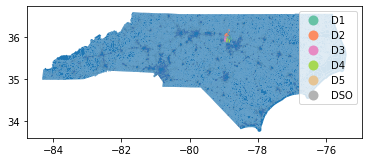

In [45]:
# quickly plot the data adding a legend
# base = policebeats.plot()
policebeats.plot(column='LAWDIST', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,10),
                         markersize=0.001, 
                         cmap="Set2", ax=ncblockmap.plot(), 
                        #  aspect=1
                         );

In [99]:
ncblockmap = ncblockmap.to_crs("EPSG:4326")

In [100]:
racedata = pd.read_csv('/Users/erikrobertsson/Downloads/Race data files/DECENNIALPL2020.P1_data_with_overlays_2022-06-02T110204.csv', skiprows =1
)
racedata['GEOID20'] = racedata['id'].str[-15:]
racedata.drop('id', axis=1, inplace=True)
racedata

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more ra

In [11]:
racedata["GEOID20"].head(1)

0    370630001011000
Name: GEOID20, dtype: object

In [ ]:
#racedata2 = racedata.copy()
#racedata["GEOID20"] = racedata["GEOID20"].map(lambda g: str(int(g+0.1)))

TypeError: can only concatenate str (not "float") to str

In [101]:
durhamblockmap = ncblockmap[ncblockmap["COUNTYFP20"]=="063"]
len(durhamblockmap), len(ncblockmap),len(racedata),len(policebeats)

(4401, 236638, 4401, 119)

In [102]:
durhamracemap = pd.merge(racedata, durhamblockmap, on ='GEOID20')
durhamracemap


,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more ra

In [ ]:
durhamracemap.geometry

0       POLYGON ((-78.88998 36.01852, -78.88995 36.019...
1       POLYGON ((-78.88993 36.02006, -78.88990 36.021...
2       POLYGON ((-78.88749 36.02015, -78.88746 36.021...
3       POLYGON ((-78.88872 36.01988, -78.88867 36.021...
4       POLYGON ((-78.88098 36.02211, -78.87992 36.022...
                              ...                        
4396    POLYGON ((-78.86527 35.87075, -78.86498 35.870...
4397    POLYGON ((-78.86568 35.87061, -78.86540 35.870...
4398    POLYGON ((-78.87003 35.86799, -78.86977 35.868...
4399    POLYGON ((-78.87243 35.89600, -78.87216 35.896...
4400    POLYGON ((-78.87929 35.93618, -78.87927 35.937...
Name: geometry, Length: 4401, dtype: geometry

In [103]:
durhamracemap = durhamblockmap.set_index('GEOID20').join(racedata.set_index('GEOID20'))
durhamracemap.head(3)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black o

In [104]:
durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[#,@,&,!]', '')
durhamracemap.columns = durhamracemap.columns.str.replace('[:]', '_')
durhamracemap.head()

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/2631631363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/2631631363.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  durhamracemap.columns = durhamracemap.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/2631631363.py:2: FutureWarning: The default value of regex will change from True to False in a 

,statefp20,countyfp20,tractce20,blockce20,name20,mtfcc20,ur20,uace20,uatype20,funcstat20,aland20,awater20,intptlat20,intptlon20,geometry,geographic_area_name,total_,total_population_of_one_race_,total_population_of_one_race_white_alone,total_population_of_one_race_black_or_african_american_alone,total_population_of_one_race_american_indian_and_alaska_native_alone,total_population_of_one_race_asian_alone,total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone,total_population_of_one_race_some_other_race_alone,total_population_of_two_or_more_races_,total_population_of_two_or_more_races_population_of_two_races_,total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american,total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_white;_asian,total_population_of_two_or_more_races_population_of_two_races_white;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_white;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_two_races_asian;_some_other_race,total_population_of_two_or_more_races_population_of_two_races_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_american_indian_and_alaska_native,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_black_or_african_american;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_white;_asian;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_white;_native_hawaiian_and_other_pacific_islander;_some_other_race,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_asian,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_native_hawaiian_and_other_pacific_islander,total_population_of_two_or_more_races_population_of_three_races_black_or_african_american;_american_indian_and_alaska_native;_some_other_race,total_population_of_two_or_more_ra

In [105]:
durhamracemap['propwhite']= durhamracemap['total_population_of_one_race_white_alone'] / durhamracemap['total_']
durhamracemap['propblack']= durhamracemap['total_population_of_one_race_black_or_african_american_alone'] / durhamracemap['total_']
durhamracemap['area'] = durhamracemap.area
durhamracemap['popdensity']= durhamracemap['total_'] / durhamracemap['area']
# durhamracemap.sort_values(by='popdensity', inplace=True, ascending=False)
# durhamracemap = durhamracemap.drop(labels=['370630011001003','370630020254001','370630013031012','370630020372058','370630020343006'], axis=0)

/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/2126439280.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  durhamracemap['area'] = durhamracemap.area


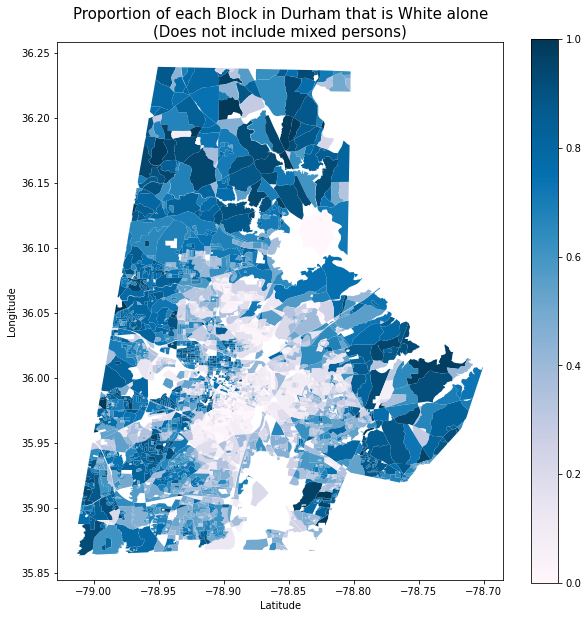

In [25]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propwhite',
                                legend=True,
                                cmap="PuBu", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

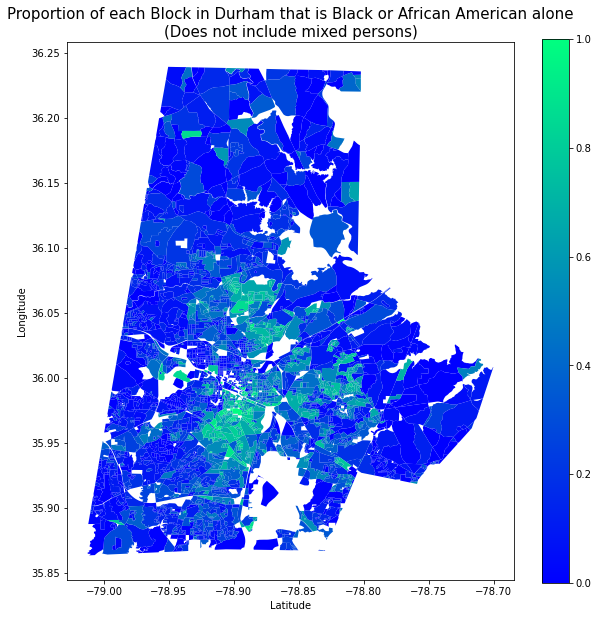

In [18]:
#Plot chloropleth map with merged data
fig, ax = plt.subplots(figsize = (10,10))
durhamracemap.plot(column='propblack',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is Black or African American alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [19]:
durhamracemap.columns

Index(['statefp20', 'countyfp20', 'tractce20', 'blockce20', 'name20',
       'mtfcc20', 'ur20', 'uace20', 'uatype20', 'funcstat20', 'aland20',
       'awater20', 'intptlat20', 'intptlon20', 'geometry',
       'geographic_area_name', 'total_', 'total_population_of_one_race_',
       'total_population_of_one_race_white_alone',
       'total_population_of_one_race_black_or_african_american_alone',
       'total_population_of_one_race_american_indian_and_alaska_native_alone',
       'total_population_of_one_race_asian_alone',
       'total_population_of_one_race_native_hawaiian_and_other_pacific_islander_alone',
       'total_population_of_one_race_some_other_race_alone',
       'total_population_of_two_or_more_races_',
       'total_population_of_two_or_more_races_population_of_two_races_',
       'total_population_of_two_or_more_races_population_of_two_races_white;_black_or_african_american',
       'total_population_of_two_or_more_races_population_of_two_races_white;_american_indian_and

In [106]:
#Assign each census block to a police beat with for loop
cblockIndexToBeat = {}
sIndex = policebeats.sindex

for cblock_ind in durhamblockmap.index:
    cblock_geom = durhamblockmap.loc[cblock_ind]["geometry"]
    possibleBeatMatches = list(sIndex.intersection(cblock_geom.bounds))
    matched = False

    if len(possibleBeatMatches) > 0:
        possibleMatches = policebeats.iloc[possibleBeatMatches]
        intersectingAreas = possibleMatches.intersection(cblock_geom).area
        intersectingAreas /= cblock_geom.area
        police_beat_index = intersectingAreas.idxmax()
        maxIntersection = intersectingAreas.max()
    ##########
        if maxIntersection < 0.1:
            continue
    ##########
        if maxIntersection > 0:
            cblockIndexToBeat[cblock_ind] = policebeats.loc[police_beat_index]['LAWBEAT']
            matched = True

cblockDurhamBeats = ncblockmap[ncblockmap.index.isin(cblockIndexToBeat)]
cblockDurhamBeats['Beat'] = cblockDurhamBeats.index.map(lambda ii: cblockIndexToBeat[ii])


/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/3395985830.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/3395985830.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/var/folders/wp/8v0b6s453zqc6tdymx2qv2l80000gp/T/ipykernel_51923/3395985830.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersectingAreas = possibleMatches.intersection(cblock_geom).area
/

In [128]:
#putting race data into the police beat and block data
beatswithrace = pd.merge(racedata, cblockDurhamBeats, on ='GEOID20')
beatswithrace.head(3)

,Geographic Area Name,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more ra

In [129]:
#summing the population by police beat
popsumbybeat = beatswithrace.groupby('Beat', as_index=False).sum()
popsumbybeat


,Beat,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population

In [127]:
#adding beat geometry to popsumbybeat
raceineachbeat = pd.merge(popsumbybeat, policebeats, left_on='Beat', right_on='LAWBEAT')
raceineachbeat.head(3)

,Beat,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population

In [118]:
#setting the beat as the index
raceineachbeat = popsumbybeat.set_index('Beat').join(policebeats.set_index('Beat'))
raceineachbeat.head(3)

,!!Total:,!!Total:!!Population of one race:,!!Total:!!Population of one race:!!White alone,!!Total:!!Population of one race:!!Black or African American alone,!!Total:!!Population of one race:!!American Indian and Alaska Native alone,!!Total:!!Population of one race:!!Asian alone,!!Total:!!Population of one race:!!Native Hawaiian and Other Pacific Islander alone,!!Total:!!Population of one race:!!Some Other Race alone,!!Total:!!Population of two or more races:,!!Total:!!Population of two or more races:!!Population of two races:,!!Total:!!Population of two or more races:!!Population of two races:!!White; Black or African American,!!Total:!!Population of two or more races:!!Population of two races:!!White; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!White; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!White; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!White; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of two races:!!Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of two races:!!Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; American Indian and Alaska Native,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Black or African American; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; American Indian and Alaska Native; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of three races:!!White; Asian; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!White; Native Hawaiian and Other Pacific Islander; Some Other Race,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Asian,!!Total:!!Population of two or more races:!!Population of three races:!!Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,!!Total:!!Population of two or more races:!!Population of t

AttributeError: 'Line2D' object has no property 'aspect'

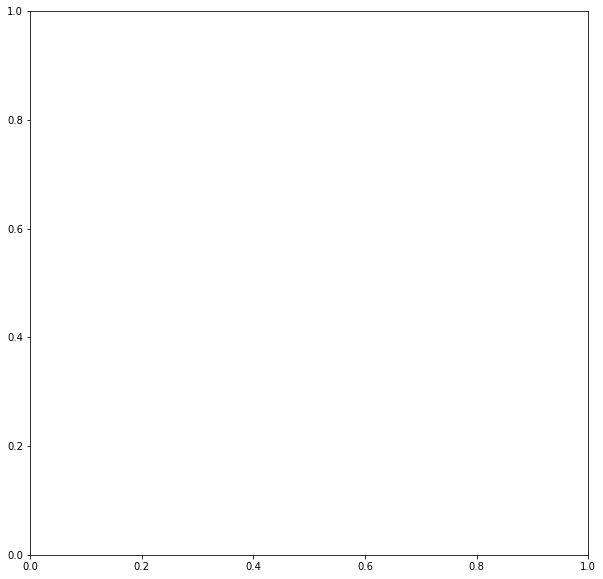

In [122]:
#trying to plot the race data by beat
fig, ax = plt.subplots(figsize = (10,10))
raceineachbeat.plot(column=' !!Total:',
                                legend=True,
                                cmap="winter", ax=ax, aspect=1);

# ax.set(title='Number of Calls by Police Beat')
plt.title("Proportion of each Block in Durham that is White alone\n(Does not include mixed persons)", fontsize = 15)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [133]:
#seeing how many blocks there are per beat
blocksperbeat = beatswithrace.groupby( ["Beat"] ).size().to_frame(name = 'block_count').reset_index()
meanblocksperbeat = blocksperbeat[["block_count"]].mean()
meanblocksperbeat

block_count    90.189189
dtype: float64

192  pwd
  193  cd Documents/dataplus
  194  ls
  195  cd dataplus-project27-community-safety-durham/
  196  git log --oneline --decorate --graph --all
  198  git status
  199  git add
  200  git add 10_code/dpddata.ipynb
  201  git commit -m "createdracemaps"
  202  git push
  203  git pull
